In [69]:
import pandas as pd
from vega_datasets import data

In [70]:
# getting our data to answer our first set of questions and asigning it to a variable 
df= data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [71]:
# making sure that the data types are correct 
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [72]:
# checking for null values
df.isna().sum()

temp    0
date    0
dtype: int64

In [73]:
df= df.set_index('date')

# Datetime Exercises

## Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

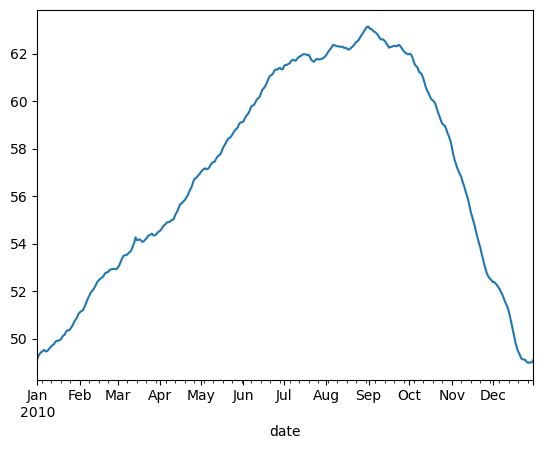

In [74]:
df.resample('D').mean()['temp'].plot()

## Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

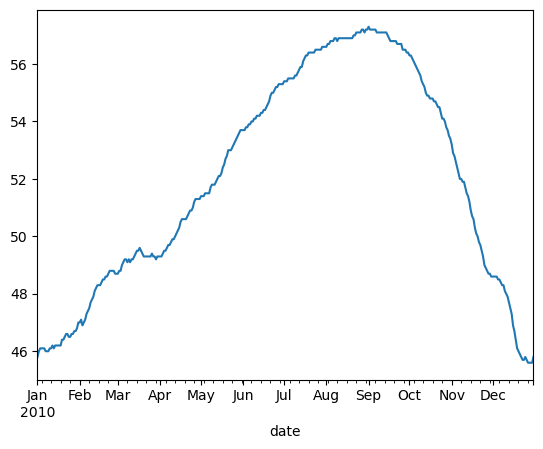

In [75]:
df.resample('D').min()['temp'].plot()

## Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

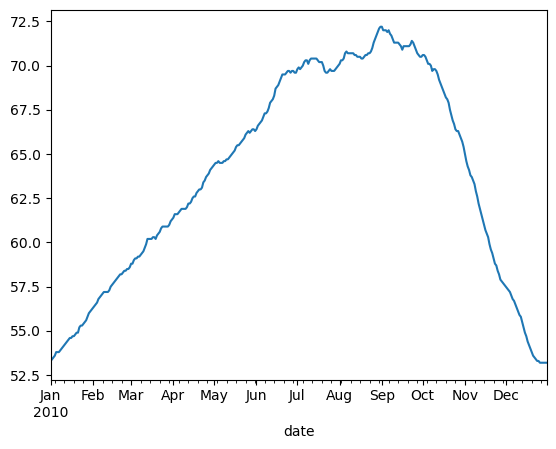

In [76]:
df.resample('D').max()['temp'].plot()

## Which month is the coldest, on average?

In [77]:
df.resample('M').mean()['temp'].min(), 

(49.98413978494623,)

## Which month has the highest average temperature?

In [78]:
df['month']= df.dt.
df

,temp,month
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January
2010-01-01 02:00:00,46.9,January
2010-01-01 03:00:00,46.5,January
2010-01-01 04:00:00,46.0,January
...,...,...
2010-12-31 19:00:00,50.4,December
2010-12-31 20:00:00,49.9,December
2010-12-31 21:00:00,49.4,December


In [94]:
avg_temp= []
for month in df['month']:
    avg_temp.append(df.temp.mean())
    
    return avg_temp

SyntaxError: 'return' outside function (1351479517.py, line 5)

## Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

## Set 2 of Exercises

In [59]:
df= data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [35]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [36]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [61]:
df= df.set_index('date')
df.head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle


## Which year and month combination has the highest amount of precipitation?

## Visualize the amount of monthly precipitation over time.

date
2012-12-31    AxesSubplot(0.125,0.11;0.775x0.77)
2013-12-31    AxesSubplot(0.125,0.11;0.775x0.77)
2014-12-31    AxesSubplot(0.125,0.11;0.775x0.77)
2015-12-31    AxesSubplot(0.125,0.11;0.775x0.77)
Freq: A-DEC, Name: precipitation, dtype: object

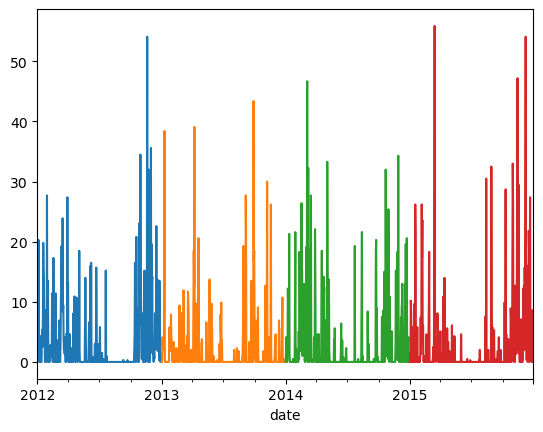

In [64]:
df.resample('Y')['precipitation'].plot()

## Visualize the amount of wind over time. Choose a time interval you think is appropriate.

## Which year-month combination is the windiest?

## What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

## In which month does it rain the most?

## Which month has the most number of days with a non-zero amount of precipitation?

# Set 3 of Exercises

## Convert any negative delays to 0.

## Which hour of the day has the highest average delay?

## Does the day of the week make a difference in the delay amount?

## Does the month make a difference in the delay amount?